In [1]:
import numpy as np
import pandas as pd

## 1. Import the data from Bank Authentication Data Set (Links to an external site.) after converting text file into CSV and also name the column as per the sequence of the attribute information.

In [2]:
#Read text file and convert to csv
text_file = pd.read_csv("./data/data_banknote_authentication.txt") 
  
#storing this dataframe in a csv file 
text_file.to_csv('./data/data_banknote_authentication.csv',  index = None) 

#read the csv file
banknote_dataset = pd.read_csv("./data/data_banknote_authentication.csv", header = None)

#add the columns
banknote_dataset.columns = ["Variance","Skewness","Kurtosis","Entropy","Class"]

#print the data with added headers
banknote_dataset.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## 2.1 Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y. 

In [3]:
# Extract independent variables
X = banknote_dataset.iloc[:,:-1].values
print('Independet Variables:')
print(X)
print()

#Extract dependent variable
Y = banknote_dataset.iloc[:, -1].values
print('Dependent Variables:')
print(Y)

Independet Variables:
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]

Dependent Variables:
[0 0 0 ... 1 1 1]


## 2.2 Remove columns which don’t help the problem statement.

          Variance  Skewness  Kurtosis   Entropy
Variance  1.000000  0.180554 -0.226455  0.167355
Skewness  0.180554  1.000000 -0.552451 -0.390601
Kurtosis -0.226455 -0.552451  1.000000  0.283635
Entropy   0.167355 -0.390601  0.283635  1.000000


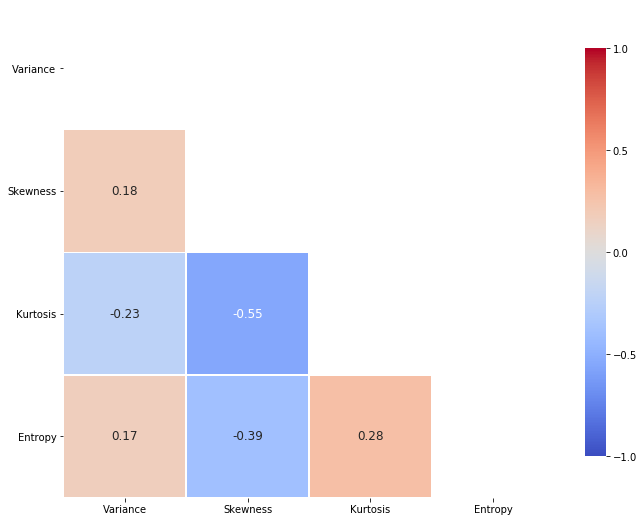

In [4]:
#Calculate the correlation matrix of the independent variables.
corr_matrix = banknote_dataset.iloc[:,:-1].corr(method ='kendall')
print(corr_matrix)

#Plot the correlation matrix.
import matplotlib.pyplot as plt
import seaborn as sb

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sb.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sb.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Here if we take 0.8 as threshold value for considering two independent variables to be correlated, We find that no independent variable are coorelated and none can't be dropped.

## 3. Compute some basic statistical details like percentile, mean, standard deviation of dataset.

In [5]:
# print basic statistics using panda's function.
banknote_dataset.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## 4. Create a Countplot of the Classes.

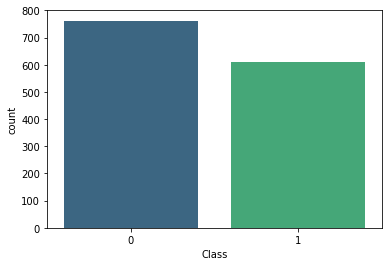

In [6]:
# count plot of dependent variable (Class)
sb.countplot(x = 'Class', data = banknote_dataset, palette = 'viridis')

## 5. Do Feature Scaling on Independent variables.

In [7]:
from sklearn.preprocessing import StandardScaler
# scaling the dataset
scaller = StandardScaler()
X = scaller.fit_transform(banknote_dataset)

## 6. Split the data into train and test dataset.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Split the data into train and test dataset (1 point)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
print("X_train shape:", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: {}", y_test.shape)

X_train shape: (1097, 5)
X_test shape (275, 5)
y_train shape: (1097,)
y_test shape: {} (275,)


## 7. Use sklearn library to train on train dataset on random forest and predict on test dataset.

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
## Prediction
y_pred=classifier.predict(X_test)

## 8.1 Compute the accuracy.

In [11]:
from sklearn.metrics import accuracy_score
## compute and print Accuracy
score=accuracy_score(y_test,y_pred)
print('Accuracy:',  score)

Accuracy: 1.0


## 8.2 Compute the confusion matrix.

In [12]:
from sklearn.metrics import confusion_matrix

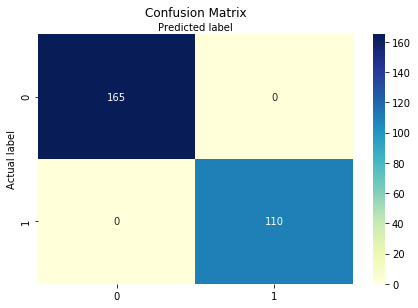

In [13]:
#Calculate confusion matrix
random_forest_confusion_matrix  = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
class_names = ['Fake','Authentic']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(random_forest_confusion_matrix), annot = True, 
           cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=2.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()